# Task_1_Prediction of Percentage
### Author : Mansi Gupta


In [ ]:
import pandas as pd
import numpy as np  
import pylab as pl
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting the distribution of scores

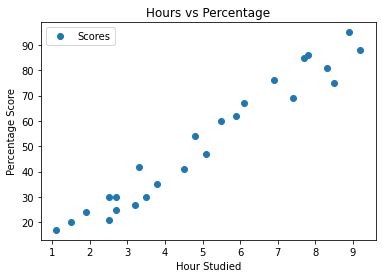

In [3]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hour Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [4]:
X = s_data.iloc[:, :-1].values  ## divide the data into "attributes" (inputs) and "labels" (outputs).
## iloc[:, :-1]. values , it will select till the second last column of the data frame
y = s_data.iloc[:, 1].values  ## s_data.iloc[:, 1] returns a series (vector)   

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the Algorithm

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


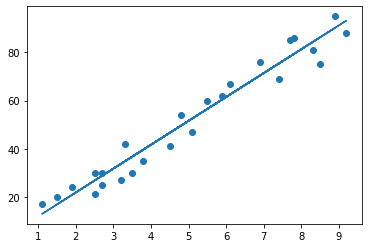

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating the model

In [10]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_pred) ** 2))
print("R2-score: %.2f" % r2_score(y_pred, y_test) )

Mean Absolute Error: 4.183859899002975
Residual sum of squares (MSE): 21.60
R2-score: 0.95
